# **FLISol BA 2021** - Carlos Bustillo

### 0. Consideraciones

Requiere que los archivos 'sim.py', 'simConst.py', 'remoteapi.dll' estén alojados en la misma carpeta que este cuaderno de Jupyter.
Incluir en el script de Coppelia la línea: simRemoteApi.start(19999)

In [1]:
# Se importa las librerías necesarias
import sim
import sympy as sp                    
import matplotlib.pyplot as plt # pyplot
import numpy as np      

### 1. Establecer la conexión

Utilizaremos las funciones del API Remoto de VREP.
<br>Para más detalles refiérase a la documentación de la librería:
<br>http://www.coppeliarobotics.com/helpFiles/en/remoteApiFunctionsPython.htm

In [2]:
def connect(port):
# Establece la conexión a VREP
# port debe coincidir con el puerto de conexión en VREP
# retorna el número de cliente o -1 si no puede establecer conexión
    sim.simxFinish(-1) # Por si acaso, cierre todas las conexiones abiertas.
    clientID=sim.simxStart('127.0.0.1',port,True,True,2000,5) # Conectarse
    if clientID == 0: print("Conectado a", port)
    else: print("No se pudo conectar")
    return clientID

In [3]:
# Obtenemos los manejadores para cada una de las articulaciones del Robot
def getHandlers():
    retCode,effector=sim.simxGetObjectHandle(clientID,'effector',sim.simx_opmode_blocking)
    retCode,target=sim.simxGetObjectHandle(clientID,'Cuboid',sim.simx_opmode_blocking)
    retCode,joint1=sim.simxGetObjectHandle(clientID,'MTB_joint1',sim.simx_opmode_blocking)
    retCode,joint2=sim.simxGetObjectHandle(clientID,'MTB_joint2',sim.simx_opmode_blocking)
    retCode,joint3=sim.simxGetObjectHandle(clientID,'MTB_joint3',sim.simx_opmode_blocking)
    retCode,joint4=sim.simxGetObjectHandle(clientID,'MTB_joint4',sim.simx_opmode_blocking)
    joint = [joint1, joint2, joint3, joint4]
    return joint, effector, target

### 2. Inicializar

In [4]:
# Obtenemos el manejador del sensor de visión
clientID = connect(19999)
joint, effector, target = getHandlers()
retCode,sensorHandle=sim.simxGetObjectHandle(clientID,'Vision_sensor',sim.simx_opmode_blocking)

Conectado a 19999


### 3. Visualizar Imagen captada

In [5]:
# Obtenemos la imagen
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)

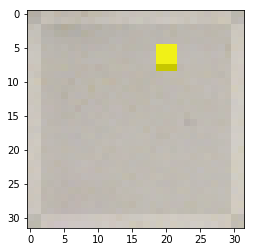

In [6]:
img = np.array(image, dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
plt.imshow(img)